<a href="https://colab.research.google.com/github/Syeda-Mahjabin-Proma/Fabric-Wetness-Detection-Model-Using-ML/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arduino code used to get the create the dataset for the system. #




```

#include <DHT.h>
#define Type DHT22
int sensePin=3;
DHT HT(sensePin,Type);
float humidity;
float tempC;
float tempF;

int setTime = 500;
int delayTime = 7000;
int countDown = 1000;

void setup() {
    Serial.begin(9600);
    HT.begin();
    delay(setTime);
}

void loop() {
    humidity=HT.readHumidity();
    tempC=HT.readTemperature();
    tempF=HT.readTemperature(true);
    Serial.print(">>>Reading Humidity and Sensor in ");
    delay(countDown);
    Serial.print("3,");
    delay(countDown);
    Serial.print("2,");
    delay(countDown);
    Serial.println("1...");
    Serial.print("Humidity: ");
    Serial.print(humidity);
    Serial.print(" || Temperature C: ");
    Serial.print(tempC);
    Serial.print("°C");
    Serial.print(" || Temperature F: ");
    Serial.print(tempF);
    Serial.println("°F");
    delay(delayTime);
}

```

# Data Visualization & Preprocessing

### Necessary Inputs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


### Reading Dataset

In [4]:
fab_test = pd.read_csv("/content/drive/MyDrive/CSE427/Lab/Project/humidity_temp_dataset.csv")

### Describing Dataset

In [5]:
fab_test.head()

,Humidity,Temperature C,Room Temp,Room Humidity,Dry/Wet
0,73.5,31.0,31.0,73.1,Dry
1,80.9,30.8,31.0,73.1,Wet
2,81.9,30.7,31.0,73.1,Wet
3,80.1,30.6,31.0,73.1,Wet
4,76.4,30.6,31.0,73.1,Dry


In [6]:
fab_test.describe()

,Humidity,Temperature C,Room Temp,Room Humidity
count,182.000000,182.000000,182.000000,182.000000
mean,76.412088,30.369780,30.674725,67.548352
std,6.748912,0.987725,0.394042,4.939353
min,63.000000,27.600000,30.200000,62.300000
25%,71.600000,30.000000,30.200000,62.300000
50%,75.400000,30.500000,31.000000,66.500000
75%,81.900000,31.000000,31.000000,73.100000
max,90.000000,31.900000,31.000000,73.100000


### Unique Value Check

In [13]:
fab_test.nunique()

,0
Humidity,116
Temperature C,38
Room Temp,2
Room Humidity,3
Dry/Wet,2


### Checking the dataset of different column

In [14]:
fab_test.dtypes

,0
Humidity,float64
Temperature C,float64
Room Temp,float64
Room Humidity,float64
Dry/Wet,object


### Encoading Target Value

In [ ]:
unique_result = fab_test['CourseCategory'].unique()
print(unique_result)


# Splitting the Dataset

In [ ]:
X = fab_test.drop(columns='label', axis=1)
y = fab_test['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [ ]:
X_train.head(),y_train.head()

(     Fabric Humidity  Fabric Temperature  Room Temp  Room Humidity
 174             77.1                29.1       31.0           66.5
 164             72.1                31.3       31.0           66.5
 117             84.2                30.1       30.2           62.3
 120             87.3                30.0       30.2           62.3
 160             74.5                30.9       31.0           66.5,
 174    W
 164    D
 117    W
 120    W
 160    D
 Name: label, dtype: object)

In [ ]:
X_test.tail(),y_test.tail()

(     Fabric Humidity  Fabric Temperature  Room Temp  Room Humidity
 40              84.7                28.8       31.0           73.1
 59              70.4                31.8       31.0           73.1
 17              73.4                30.9       31.0           73.1
 5               73.9                30.8       31.0           73.1
 168             77.7                30.0       31.0           66.5,
 40     W
 59     D
 17     D
 5      D
 168    W
 Name: label, dtype: object)

# Checking Accuracy on Training Data Using different Algorithm

In [ ]:
#Logistic Regrassion
log = LogisticRegression()
log.fit(X_train, y_train)
X_train_prediction = log.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)
print('Logictic Regression Accuracy:', str(round(training_data_accuracy*100,2))+"%")

Logictic Regression Accuracy: 99.31%


In [ ]:
#Decision Tree
tree=DecisionTreeClassifier(random_state=0,criterion="gini", max_depth = 2)
tree.fit(X_train,y_train)
X_train_prediction = tree.predict(X_train)
training_data_accuracy = tree.score(X_train,y_train)
print('Decision Tree accuracy:',str(round(training_data_accuracy*100,2))+"%")

Decision Tree accuracy: 98.62%


# Using Logistic Regrassion on Testing Data

In [ ]:
# accuracy on test data
X_test_prediction = log.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_prediction)
print('Test Data Accuracy:', str(round(test_data_accuracy*100,2))+"%")

Test Data Accuracy: 97.3%


# Confusion Matrix

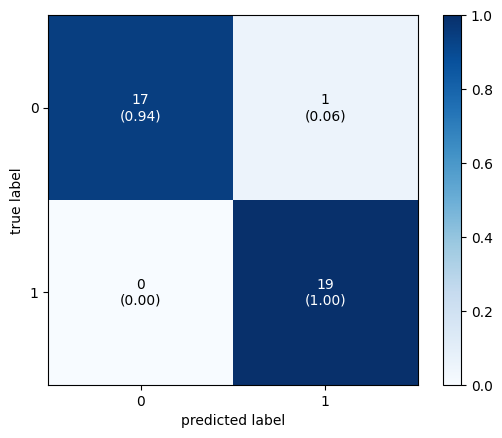

In [ ]:
y_predict = log.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_predict)
plot_confusion_matrix(conf_mat=cnf_matrix,show_absolute=True,
                      show_normed=True,
                      colorbar=True)
plt.show()

# Checking With a Random data form the Dataset

In [ ]:
data = (82.7, 30.2, 30.2, 62.3)
data_np_array = np.asarray(data)
data_reshaped = data_np_array.reshape(1,-1)
prediction = log.predict(data_reshaped)

if (prediction[0] == "D"):
    print('This Fabrics is DRY')

if (prediction[0] == "W"):
    print('This Fabrics is WET')

This Fabrics is WET


In [ ]:
data = (73.9, 30.8, 31, 73.1)
data_np_array = np.asarray(data)
data_reshaped = data_np_array.reshape(1,-1)
prediction = log.predict(data_reshaped)

if (prediction[0] == "D"):
    print('This Fabrics is DRY')

if (prediction[0] == "W"):
    print('This Fabrics is WET')

This Fabrics is DRY


In [ ]:
data = (77.7, 30, 31, 66.5)
data_np_array = np.asarray(data)
data_reshaped = data_np_array.reshape(1,-1)
prediction = log.predict(data_reshaped)

if (prediction[0] == "D"):
    print('This Fabrics is DRY')

if (prediction[0] == "W"):
    print('This Fabrics is WET')

This Fabrics is WET
